# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:black">  Lecture 6</span>
### Made by Alessandro Bertarelli

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

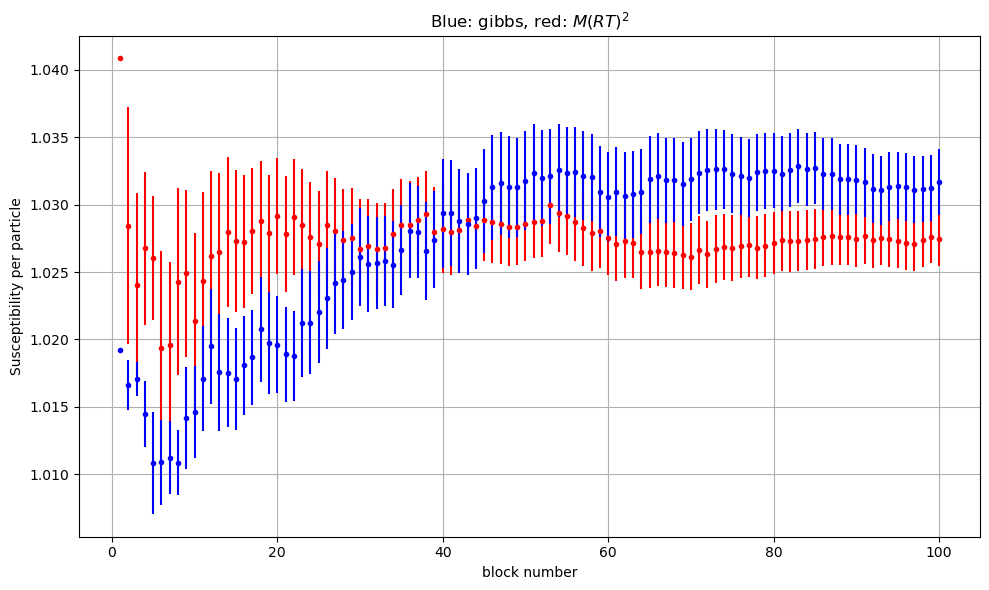

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (10,6))

mydata = open("susceptibilitymetro.dat", "r")
length = len(mydata.readlines())
mydata.close()

#The following lines are my best attempt at converting .dat file entries into something I can work with

df = pd.read_csv('susceptibilitymetro.dat', delimiter='\t')
datalist = df.values.tolist()

averages = []
error = []
j = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    averages.append(float(mylist[2]))
    error.append(float(mylist[3]))
    j.append(i+1)

plt.subplot(1,1,1)

plt.errorbar(j, averages, error, xerr = None, fmt = ".r")    
plt.xlabel('block number')
plt.ylabel('Susceptibility per particle')
plt.grid(True)
plt.tight_layout()

mydata = open("susceptibilitygibbs.dat", "r")
length = len(mydata.readlines())
mydata.close()

#The following lines are my best attempt at converting .dat file entries into something I can work with

df = pd.read_csv('susceptibilitygibbs.dat', delimiter='\t')
datalist = df.values.tolist()

averages = []
error = []
j = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    averages.append(float(mylist[2]))
    error.append(float(mylist[3]))
    j.append(i+1)

plt.subplot(1,1,1)

plt.title("Blue: gibbs, red: $M(RT)^2$")

plt.errorbar(j, averages, error, xerr = None, fmt = ".b")    
plt.xlabel('block number')
plt.ylabel('Susceptibility per particle')
plt.grid(True)
plt.tight_layout()


The above graph was made using 100 blocks of 20'000 steps at $T* = 2.0$ each where each step corresponds to a random particle being selected for a potential flip. In total we have 2'000'000 steps.

We can observe that proper equilibration seems to happen after roughly 60 blocks or 1'200'000 total steps (24'000 average steps per particle)

One could also accept a more "rough" equilibrium after $\approx$ 50 blocks or 1'000'000 steps (20'000 av. p. particle)

For the evaluation of the susceptibility, heat capacity and magnetization curves we shall therefore first wait 70 blocks at each temperature to extract the value of interest

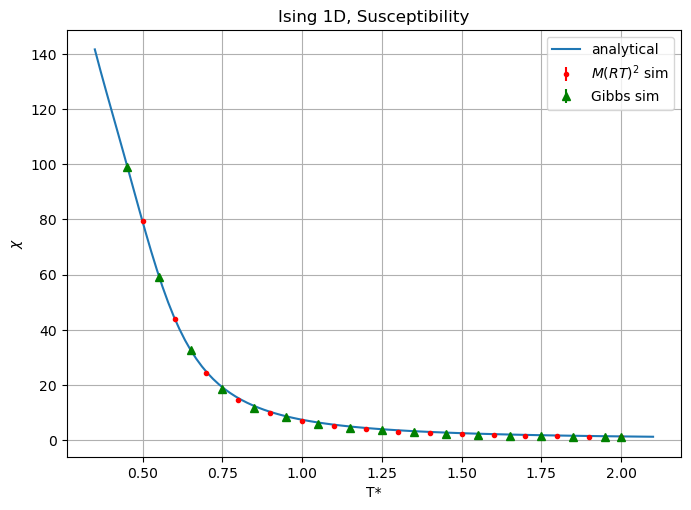

In [2]:
plt.figure(figsize = (7,5))

#The following lines are my best attempt at converting .dat file entries into something I can work with

df = pd.read_csv('Chi_metro-values.dat', delimiter='\t')
datalist = df.values.tolist()

averages = []
error = []
temps = []

for i in range (16):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    averages.append(float(mylist[2]))
    error.append(float(mylist[3]))
    temps.append(float(mylist[0]))

plt.subplot(1,1,1)

plt.errorbar(temps, averages, error, xerr = None, fmt = ".r", label = "$M(RT)^2$ sim")    
plt.xlabel('T*')
plt.ylabel('Susceptibility per particle')
plt.grid(True)
plt.tight_layout()

import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.35,2.1,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


#The following lines are my best attempt at converting .dat file entries into something I can work with

df = pd.read_csv('Chi_gibbs-values.dat', delimiter='\t')
datalist = df.values.tolist()

averages = []
error = []
temps = []

for i in range (17):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    averages.append(float(mylist[2]))
    error.append(float(mylist[3]))
    temps.append(float(mylist[0]))

plt.subplot(1,1,1)

plt.errorbar(temps, averages, error, xerr = None, fmt = "^g", label = "Gibbs sim")    
plt.xlabel('T*')
plt.ylabel('Susceptibility per particle')
plt.grid(True)
plt.tight_layout()


plt.subplot(1,1,1)
plt.plot(T, X, label = "analytical")
plt.title('Ising 1D, Susceptibility')
plt.legend(loc = "upper right")
plt.xlabel('T*')
plt.ylabel('$\chi$')
plt.show()

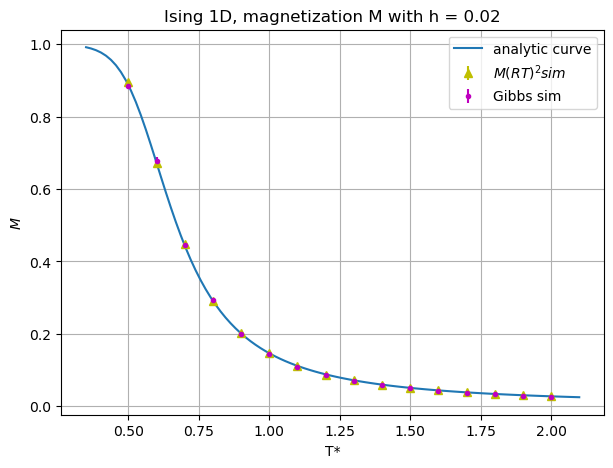

In [3]:
plt.figure(figsize = (7,5))

mydata = open("magnetization-metro.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("magnetization-metro.txt", "r")

magn= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    magn.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, magn, errors, xerr = None, fmt = "^y", label = "$M(RT)^2 sim$")    
plt.xlabel('T*')
plt.ylabel('$M$')
plt.grid(True)

mydata.close()    

mydata = open("magnetization-gibbs.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("magnetization-gibbs.txt", "r")

magn= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    magn.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, magn, errors, xerr = None, fmt = ".m", label = "Gibbs sim")    
plt.xlabel('T*')
plt.ylabel('$M$')
plt.grid(True)

mydata.close()    


h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.subplot(1,1,1)
plt.plot(T, M, label = "analytic curve")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T*')
plt.ylabel('$M$')
plt.legend()
plt.show()

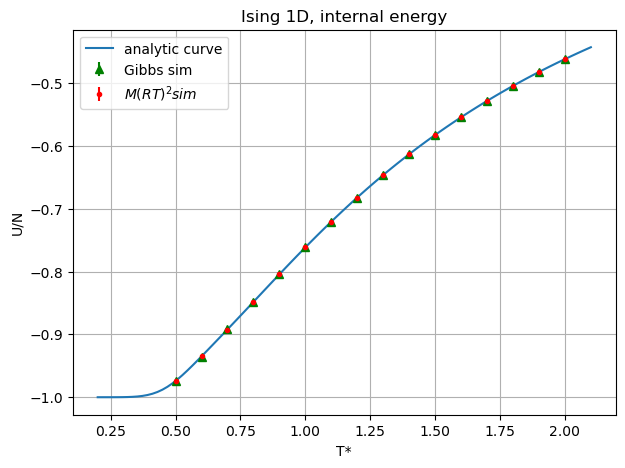

In [4]:
plt.figure(figsize = (7,5))

mydata = open("total_energy_gibbs.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("total_energy_gibbs.txt", "r")

en= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    en.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, en, errors, xerr = None, fmt = "^g", label = "Gibbs sim")    
plt.xlabel('T*')
plt.ylabel('$U/N$')
plt.grid(True)

mydata.close()    

mydata = open("total_energy_metro.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("total_energy_metro.txt", "r")

en= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    en.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, en, errors, xerr = None, fmt = ".r", label = "$M(RT)^2 sim$")    
plt.xlabel('T*')
plt.ylabel('$U/N$')
plt.grid(True)

mydata.close()    


T = np.linspace(0.2,2.1,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.subplot(1,1,1)
plt.plot(T, e, label = "analytic curve")
plt.title('Ising 1D, internal energy')
plt.xlabel('T*')
plt.ylabel('U/N')

plt.legend()
plt.show()

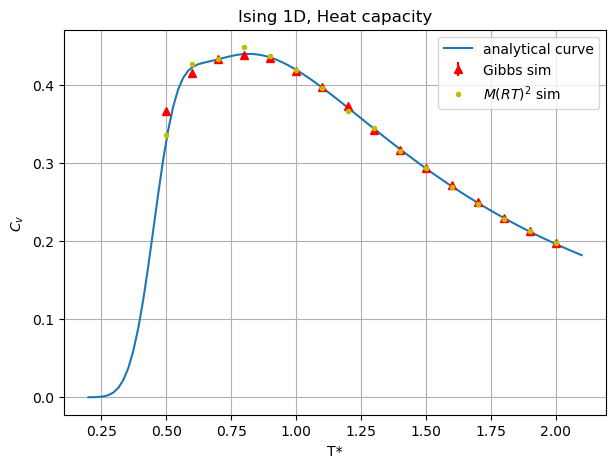

In [12]:
plt.figure(figsize = (7,5))

mydata = open("cv_gibbs.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("cv_gibbs.txt", "r")

cv= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    cv.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, cv, errors, xerr = None, fmt = "^r", label = "Gibbs sim")    
plt.xlabel('T*')
plt.ylabel('$C_v$')
plt.grid(True)

mydata.close()    

mydata = open("cv_metro.txt", "r")
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 2 elements and then we convert them to float to plot them.

mydata = open("cv_metro.txt", "r")

cv= []
errors = []
temp = []

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    cv.append(float(datalist[2]))
    errors.append(float(datalist[3]))
    temp.append(float(datalist[0]))
    
plt.subplot(1,1,1)
plt.errorbar(temp, cv, xerr = None, fmt = ".y", label = "$M(RT)^2$ sim")    
plt.xlabel('T*')
plt.ylabel('$C_v$')
plt.grid(True)

mydata.close()   

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = "analytical curve")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T*')
plt.ylabel('$C_v$')


plt.legend()
plt.show()

